In [3]:
import pandas as pd

In [59]:
df = pd.read_csv('day.csv')

In [60]:
df = df[['season', 'temp','hum','windspeed','cnt']]
df.head()

,season,temp,hum,windspeed,cnt
0,1,0.344167,0.805833,0.160446,985
1,1,0.363478,0.696087,0.248539,801
2,1,0.196364,0.437273,0.248309,1349
3,1,0.200000,0.590435,0.160296,1562
4,1,0.226957,0.436957,0.186900,1600


In [64]:
df.shape

(731, 7)

In [6]:
import seaborn as sns

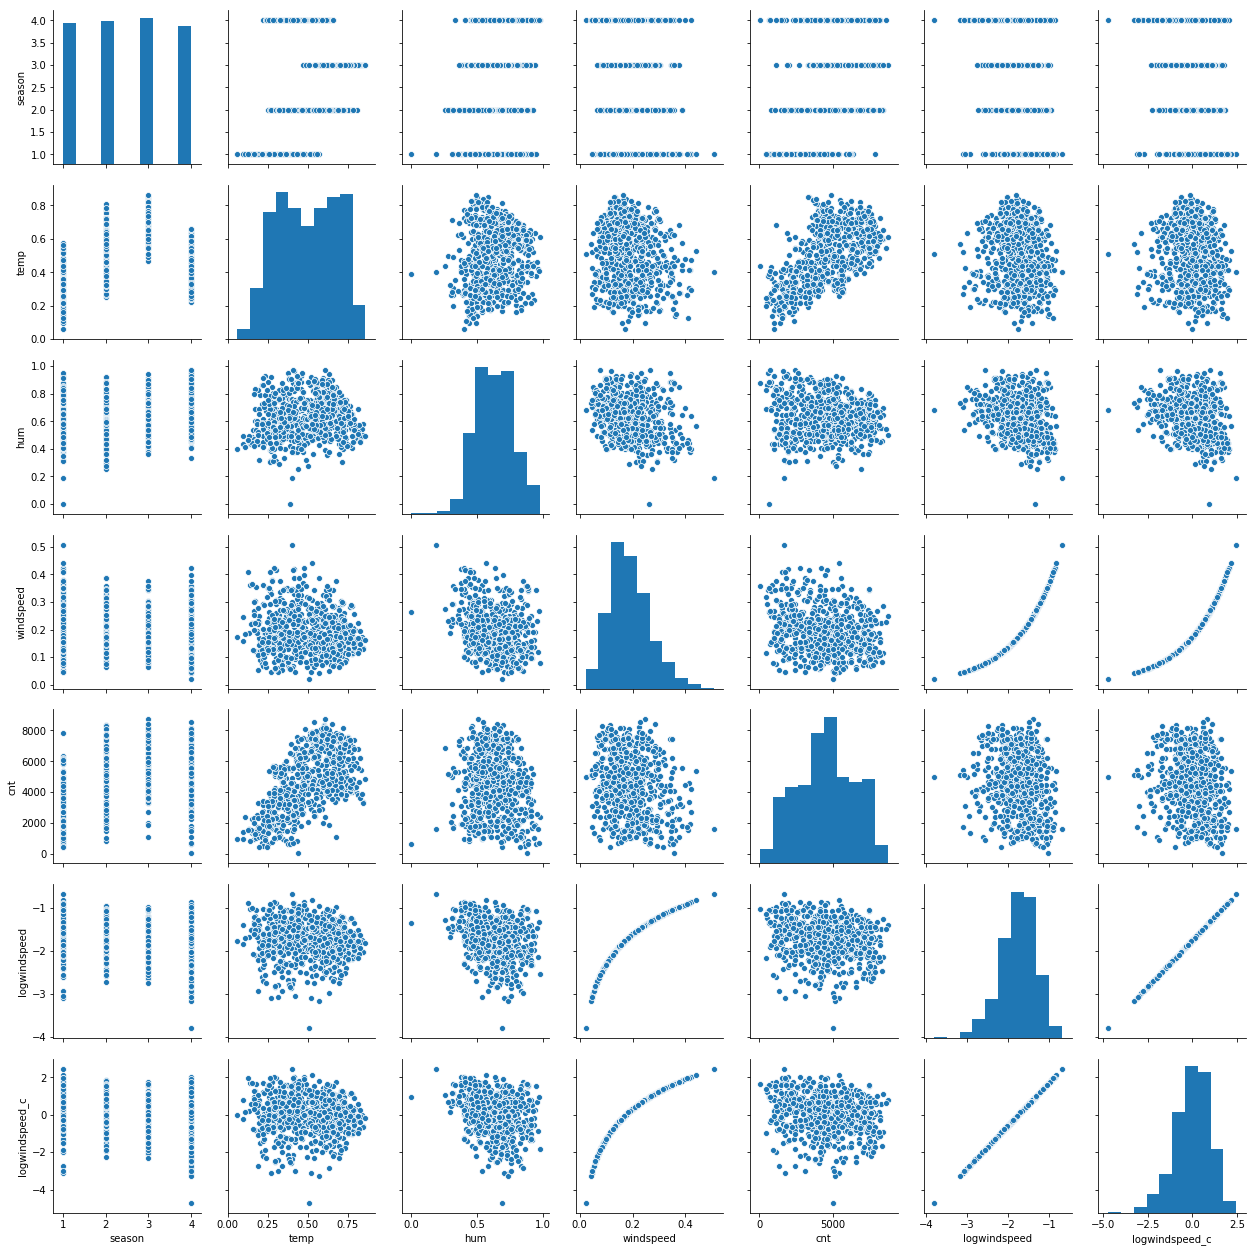

In [67]:
sns.pairplot(df)

In [7]:
df.corr()


,season,temp,hum,windspeed,cnt
season,1.000000,0.334315,0.205445,-0.229046,0.406100
temp,0.334315,1.000000,0.126963,-0.157944,0.627494
hum,0.205445,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.229046,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.406100,0.627494,-0.100659,-0.234545,1.000000


In [8]:
df['season'].head()


0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64

In [27]:
from numpy import mean
seasons = {'spring':1, 'summer':2, 'fall':3, 'winter':4}

In [25]:
spring = df[ df['season']==1]['cnt']
spring[:4]

0     985
1     801
2    1349
3    1562
Name: cnt, dtype: int64

In [26]:
summer = df[ df['season']==2]['cnt']
fall = df[ df['season']==3]['cnt']
winter = df[ df['season']==4]['cnt']

In [31]:
for i in range(1,5):
    print(i)
    print(mean(df[ df['season']==i]['cnt']))

1
2604.1325966850827
2
4992.33152173913
3
5644.303191489362
4
4728.162921348315


In [32]:
spring.boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

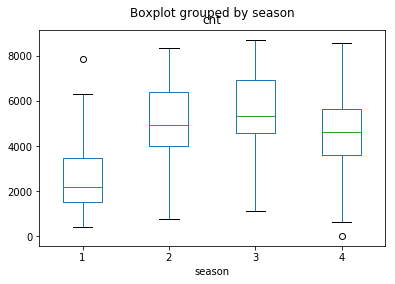

In [33]:
df.boxplot(by='season', column=['cnt'], grid=False)

In [37]:
from scipy import stats
result= stats.ttest_ind(fall, summer)
print(result)

Ttest_indResult(statistic=3.9765418611661243, pvalue=8.411509811510022e-05)


In [39]:
from numpy import std

In [41]:
nhum= (df.hum - mean (df.hum)   )/ std(df.hum)
nwindspeed = (df.windspeed-mean(df.windspeed) )/std(df.windspeed)
ntemp = (df.temp-mean(df.temp) )/ std(df.temp)
nwindspeed.head()

0   -0.387892
1    0.749602
2    0.746632
3   -0.389829
4   -0.046307
Name: windspeed, dtype: float64

In [44]:
khum = stats.kstest(nhum, 'norm')
kwindspeed = stats.kstest(nwindspeed, 'norm')
ktemp = stats.kstest(ntemp, 'norm')
print(khum)
print(kwindspeed)
print(ktemp)

KstestResult(statistic=0.03402247460327007, pvalue=0.3599584024920622)
KstestResult(statistic=0.06269855311461692, pvalue=0.0061012702064193155)
KstestResult(statistic=0.07282591241722436, pvalue=0.0008118777412464885)


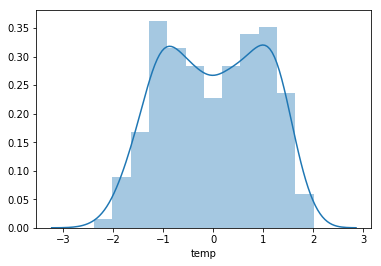

In [50]:
sns.distplot(ntemp)

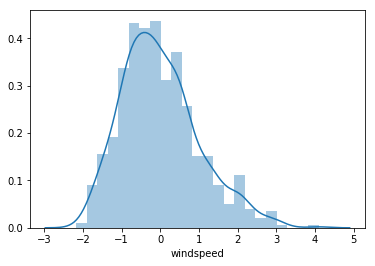

In [51]:
sns.distplot(nwindspeed)

In [61]:
import numpy as np
df['logwindspeed'] = np.log(df.windspeed)
df['logwindspeed_c'] = (df['logwindspeed'] - df['logwindspeed'].mean()) / df['logwindspeed'].std()

In [62]:
print(stats.kstest(df.logwindspeed_c, 'norm'))

KstestResult(statistic=0.04166139681294695, pvalue=0.1537545649768386)


In [63]:
df.shape

(731, 7)

<h2> For regression models ch2</h2>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('day.csv')
df = df[['season', 'temp','hum','windspeed','cnt']]
df.head()

,season,temp,hum,windspeed,cnt
0,1,0.344167,0.805833,0.160446,985
1,1,0.363478,0.696087,0.248539,801
2,1,0.196364,0.437273,0.248309,1349
3,1,0.200000,0.590435,0.160296,1562
4,1,0.226957,0.436957,0.186900,1600


In [14]:
Mtemp=smf.ols('cnt ~ temp', data=df).fit()
Mtemp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           2.81e-81
Time:                        21:19:47   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1214.6421    161.164      7.537      0.000     898.242    1531.042
temp        6640.7100    305.188     21.759      0.000    6041.558    7239.862
==============================================================================
Omnibus:                       20.477   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.566
Skew:                           0.167   Prob(JB):                      0.00187
Kurtosis:                       2.452   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
Mhum = smf.ols('cnt ~ hum', data=df).fit()
Mhum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.462
Date:                Sat, 26 Oct 2019   Prob (F-statistic):            0.00645
Time:                        21:20:59   Log-Likelihood:                -6566.0
No. Observations:                 731   AIC:                         1.314e+04
Df Residuals:                     729   BIC:                         1.315e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5363.9865    322.679     16.623      0.000    4730.496    5997.477
hum        -1369.0807    501.191     -2.732      0.006   -2353.030    -385.131
==============================================================================
Omnibus:                       60.008   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.312
Skew:                          -0.072   Prob(JB):                     3.88e-05
Kurtosis:                       2.196   Cond. No.                         9.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
Mwind = smf.ols('cnt ~ windspeed', data = df).fit()
Mwind.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     42.44
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           1.36e-10
Time:                        21:22:08   Log-Likelihood:                -6549.0
No. Observations:                 731   AIC:                         1.310e+04
Df Residuals:                     729   BIC:                         1.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5621.1529    185.062     30.374      0.000    5257.834    5984.472
windspeed  -5862.9128    899.988     -6.514      0.000   -7629.791   -4096.035
==============================================================================
Omnibus:                       45.655   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.090
Skew:                          -0.026   Prob(JB):                     0.000195
Kurtosis:                       2.253   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
seasons = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}


In [19]:
seasons = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
for season in range(1,5):
    print("--"* 20)
    print("season {}".format(seasons[season]))
    for variable in ['temp', 'hum', 'windspeed']:
        formula = "cnt ~ {}".format(variable)
        res = smf.ols(formula, data = df[df.season == season]).fit()
        print("- R^2 for {}: {:.2f}".format(variable, res.rsquared))

----------------------------------------
season spring
- R^2 for temp: 0.45
- R^2 for hum: 0.00
- R^2 for windspeed: 0.01
----------------------------------------
season summer
- R^2 for temp: 0.23
- R^2 for hum: 0.10
- R^2 for windspeed: 0.05
----------------------------------------
season fall
- R^2 for temp: 0.00
- R^2 for hum: 0.10
- R^2 for windspeed: 0.04
----------------------------------------
season winter
- R^2 for temp: 0.16
- R^2 for hum: 0.08
- R^2 for windspeed: 0.02


In [50]:
seasons = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
for season in range(1,5):
    print("--"* 20)
    print("season {}".format(seasons[season]))
    for variable in ['temp', 'hum', 'windspeed']:
        formula = "cnt ~ {}".format(variable)
        res = smf.ols(formula, data = df[df.season == season]).fit()
        print(" ")
        print(res.summary())

----------------------------------------
season spring
 
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     145.2
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           7.28e-25
Time:                        21:48:36   Log-Likelihood:                -1513.8
No. Observations:                 181   AIC:                             3032.
Df Residuals:                     179   BIC:                             3038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     15.92
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           9.67e-05
Time:                        21:48:37   Log-Likelihood:                -1568.4
No. Observations:                 178   AIC:                             3141.
Df Residuals:                     176   BIC:                             3147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7222.4547    636.944     11.339      0.0

In [52]:
Mall = smf.ols("cnt ~ temp + windspeed + hum", data = df).fit()
Mall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.2
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           4.26e-97
Time:                        21:57:03   Log-Likelihood:                -6343.9
No. Observations:                 731   AIC:                         1.270e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4084.3634    337.862     12.089      0.000    3421.061    4747.665
temp        6625.5327    293.085     22.606      0.000    6050.138    7200.927
windspeed  -4806.9293    708.904     -6.781      0.000   -6198.673   -3415.186
hum        -3100.1231    383.992     -8.073      0.000   -3853.988   -2346.258
==============================================================================
Omnibus:                       11.001   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.213
Skew:                           0.152   Prob(JB):                       0.0165
Kurtosis:                       2.579   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
Mtemp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           2.81e-81
Time:                        22:29:55   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1214.6421    161.164      7.537      0.000     898.242    1531.042
temp        6640.7100    305.188     21.759      0.000    6041.558    7239.862
==============================================================================
Omnibus:                       20.477   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.566
Skew:                           0.167   Prob(JB):                      0.00187
Kurtosis:                       2.452   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
Mall.llf

-6343.863924825989

In [60]:
Mtemp.llf > Mall.llf

False

In [62]:
Mtemp.conf_int()

,0,1
Intercept,898.242096,1531.042142
temp,6041.557701,7239.862296


In [69]:
Mall.conf_int()

,0,1
Intercept,3421.061357,4747.665412
temp,6050.138045,7200.927375
windspeed,-6198.673123,-3415.185527
hum,-3853.987908,-2346.258362


In [72]:
6050-7201

-1151

In [71]:
6041-7239

-1198

In [73]:
Mwseason = smf.ols("cnt ~ temp + windspeed + hum + season", data = df).fit()
Mwseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     187.6
Date:                Sat, 26 Oct 2019   Prob (F-statistic):          2.29e-110
Time:                        22:13:59   Log-Likelihood:                -6310.2
No. Observations:                 731   AIC:                         1.263e+04
Df Residuals:                     726   BIC:                         1.265e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3512.0294    330.061     10.641      0.000    2864.042    4160.017
temp        5886.6897    293.695     20.044      0.000    5310.098    6463.282
windspeed  -3915.9181    685.815     -5.710      0.000   -5262.335   -2569.501
hum        -3522.6473    370.437     -9.509      0.000   -4249.903   -2795.392
season       414.1348     49.507      8.365      0.000     316.941     511.329
==============================================================================
Omnibus:                        7.484   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.311
Skew:                           0.066   Prob(JB):                       0.0703
Kurtosis:                       2.604   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
print(Mall.llf)
print(Mwseason.llf)
print(Mall.rsquared_adj)
print(Mwseason.rsquared_adj)

-6343.863924825989
-6310.231066377696
0.4586703673185636
0.5055796363069207


In [77]:
print("smaller than 20 condition number means less collinearity")

smaller than 20 condition number means less collinearity


In [78]:
print("Jarque-Bera messures normal distribution of resuduals, \n pvalue over 0.05 means  NOT normally distributed resids")

Jarque-Bera messures normal distribution of resuduals, 
 pvalue over 0.05 means  NOT normally distributed resids


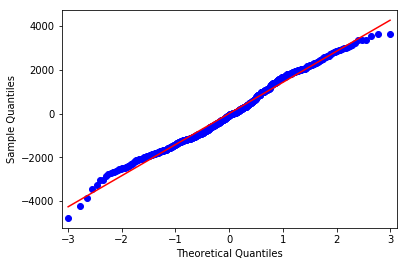

In [84]:
sm.qqplot(Mall.resid, line='r');

In [92]:
from scipy import stats
x = (Mall.resid - np.mean(Mall.resid)) / np.std(Mall.resid)
stats.kstest(x , 'norm')


KstestResult(statistic=0.04627607675527673, pvalue=0.08466144463595135)

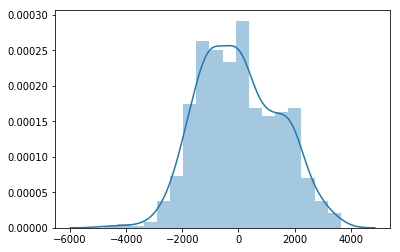

In [94]:
sns.distplot(Mall.resid)

In [95]:
print("1.5-2.5 normal Durbin Watson, <2 positiv autocorr >2 neg autocorr ")

1.5-2.5 normal Durbin Watson, <2 positiv autocorr >2 neg autocorr 


In [96]:
df['hum2'] = df.hum**2
df['temp2'] = df.temp**2
df['windspeed2'] = df.windspeed**2

In [101]:
Mtemp2 = smf.ols('cnt ~ temp + temp2 + windspeed + hum', data = df).fit()
Mhum2 = smf.ols('cnt ~ temp + hum2 + windspeed + hum', data = df).fit()
Mwind2 = smf.ols('cnt ~ temp + windspeed2 + windspeed + hum', data = df).fit()

In [102]:
Rall= Mall.rsquared_adj
Rtemp2 = Mtemp2.rsquared_adj
Rhum2 = Mhum2.rsquared_adj
Rwind2= Mwind2.rsquared_adj


In [103]:
Rall

0.4586703673185636

In [104]:
Rtemp2

0.5588899200136784

In [105]:
Rhum2

0.477578297318382

In [106]:
Rwind2

0.4579791152381797